In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN

In [2]:
#fazer o uplod diretamente pelos arquivos
from google.colab import files

arquivo = files.upload()

Saving Finance_data.csv to Finance_data.csv


In [3]:
df = pd.read_csv('Finance_data.csv')

In [4]:
# Selecionar apenas colunas numéricas para análise de outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [5]:
 from scipy.stats import zscore

In [7]:
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers_zscore = (z_scores > 3)
print("\nOutliers detectados pelo Z-score:")
print(outliers_zscore.sum())


Outliers detectados pelo Z-score:
2


In [8]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detectados pelo IQR:")
print(outliers_iqr.sum())


Outliers detectados pelo IQR:
age                 0
Mutual_Funds        3
Equity_Market       4
Debentures          1
Government_Bonds    7
Fixed_Deposits      0
PPF                 5
Gold                4
dtype: int64


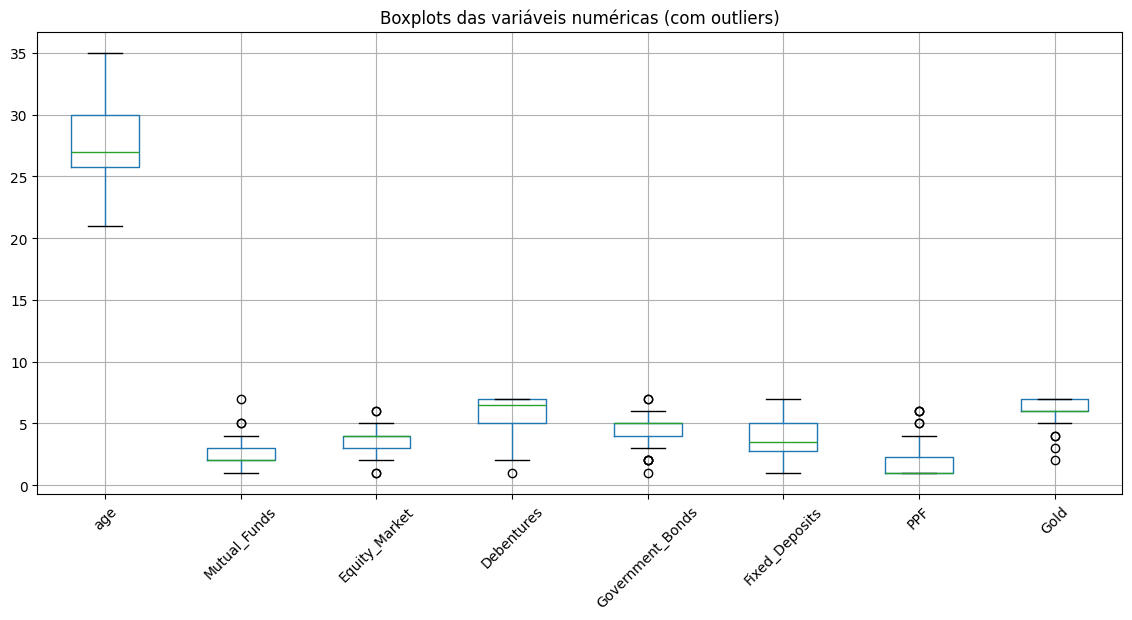

In [9]:
plt.figure(figsize=(14, 6))
df[numeric_cols].boxplot()
plt.title('Boxplots das variáveis numéricas (com outliers)')
plt.xticks(rotation=45)
plt.show()

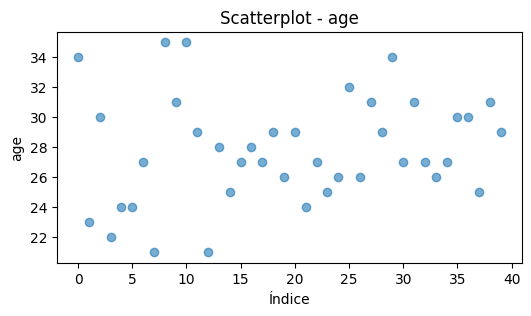

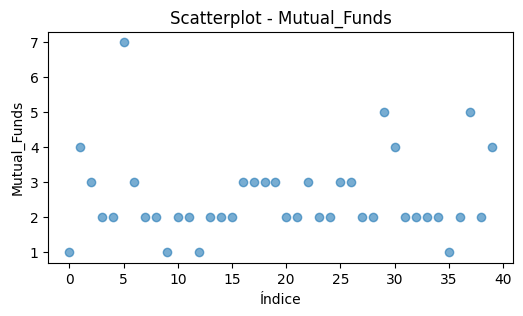

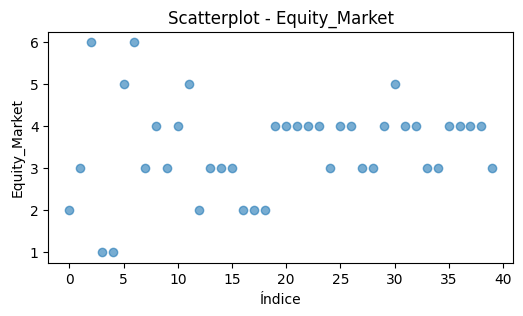

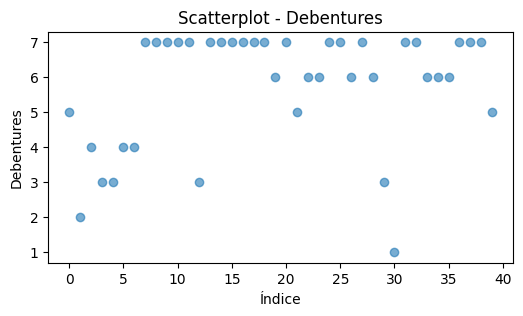

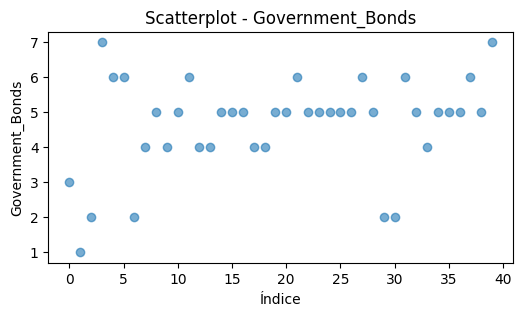

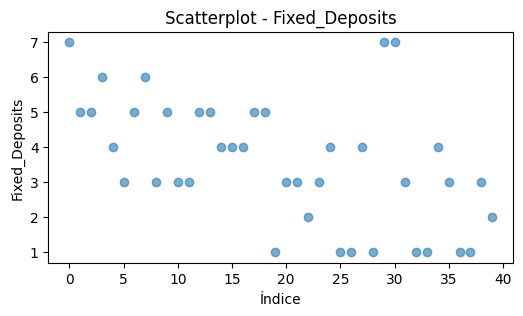

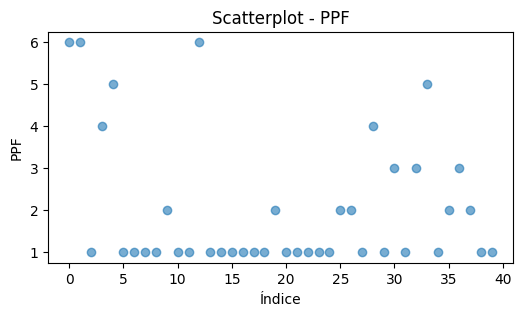

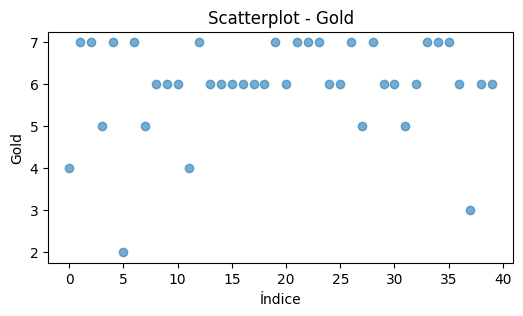

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    plt.scatter(df.index, df[col], alpha=0.6)
    plt.title(f"Scatterplot - {col}")
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.show()

In [11]:
#Remoção
df_removed = df[~outliers_iqr.any(axis=1)]


In [12]:
#Capping (Limitar valores aos limites inferior/superior do IQR)
df_capped = df.copy()
for col in numeric_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = np.where(df[col] < lower, lower,
                              np.where(df[col] > upper, upper, df[col]))

In [13]:
#Transformações
df_log = df.copy()
df_sqrt = df.copy()
for col in numeric_cols:
    # Para evitar log(0) ou valores negativos
    df_log[col] = np.log1p(df[col] - df[col].min() + 1)
    df_sqrt[col] = np.sqrt(df[col] - df[col].min() + 1)

In [14]:
def resumo_estatistico(data, titulo):
    print(f"\n--- {titulo} ---")
    print(data[numeric_cols].describe())

resumo_estatistico(df, "Original")
resumo_estatistico(df_removed, "Após Remoção de Outliers")
resumo_estatistico(df_capped, "Após Capping")
resumo_estatistico(df_log, "Após Transformação Log")
resumo_estatistico(df_sqrt, "Após Transformação Raiz Quadrada")


--- Original ---
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.000000   6.000

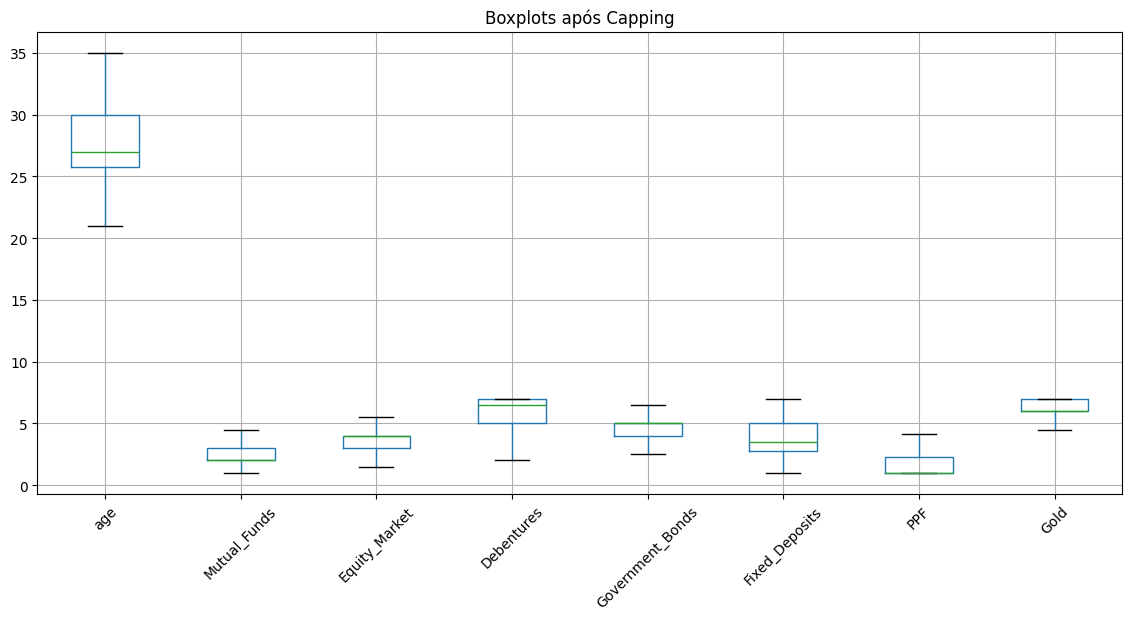

In [15]:
#pos tratamento
plt.figure(figsize=(14, 6))
df_capped[numeric_cols].boxplot()
plt.title('Boxplots após Capping')
plt.xticks(rotation=45)
plt.show()